In [2]:
import pandas as pd
import numpy as np
import os
from datetime import datetime, time

import matplotlib.pyplot as plt
# from sklearn.datasets

In [3]:
df = pd.read_csv("Daily_Ticks.csv")
df["TradeDateTime"] = pd.to_datetime(df["TradeDateTime"])
df.head()

,ShareCode,TradeDateTime,LastPrice,Volume,Value,Flag
0,ADVANC,2024-12-04 09:55:38,296.0,190300,56328800.0,OPEN1_E
1,ADVANC,2024-12-04 09:55:38,295.0,200,59000.0,Sell
2,ADVANC,2024-12-04 09:55:39,295.0,3100,914500.0,Sell
3,ADVANC,2024-12-04 09:55:39,295.0,1000,295000.0,Sell
4,ADVANC,2024-12-04 09:55:39,295.0,100,29500.0,Sell


In [30]:
df.describe()

,TradeDateTime,LastPrice,Volume,Value
count,135709,135709.000000,1.357090e+05,1.357090e+05
mean,2024-12-04 13:01:28.181454592,61.726624,8.209404e+03,2.062913e+05
min,2024-12-04 09:55:38,1.780000,1.000000e+00,1.790000e+00
25%,2024-12-04 10:47:16,12.100000,1.000000e+02,4.425000e+03
50%,2024-12-04 12:25:25,28.000000,5.000000e+02,1.944800e+04
75%,2024-12-04 15:05:39,96.750000,2.700000e+03,8.515000e+04
max,2024-12-04 16:39:05,296.000000,2.070300e+07,2.768132e+08
std,NaN,70.491405,1.048321e+05,2.290732e+06


In [73]:
share_codes = df["ShareCode"].unique()
print("share_codes =")
i = 0
while i < len(share_codes):
	print(str(i).rjust(2), end=" ")
	for j in range(i, min(i + 5, len(share_codes))):
		print(share_codes[j].rjust(7), end="")
	print()
	i += 5
print()

flags = df["Flag"].unique()
print("flags =", flags)

share_codes =
 0  ADVANC    AOT    AWC  BANPU    BBL
 5     BCP   BDMS    BEM  BGRIM     BH
10     BJC    BTS    CBG CENTEL   COM7
15   CPALL    CPF    CPN    CRC  DELTA
20      EA   EGCO GLOBAL   GPSC   GULF
25   HMPRO INTUCH    ITC    IVL  JMART
30     JMT  KBANK    KTB    KTC     LH
35    MINT    MTC     OR    OSP    PTT
40   PTTEP  PTTGC  RATCH  SAWAD    SCB
45     SCC   SCGP TIDLOR  TISCO    TLI
50     TOP   TRUE    TTB     TU    WHA

flags = ['OPEN1_E' 'Sell' 'Buy' 'Odd' 'OPEN2_E' 'ATC']


In [75]:
stocks = [df.loc[df["ShareCode"] == code] for code in share_codes]

In [80]:
stocks[2]

,ShareCode,TradeDateTime,LastPrice,Volume,Value,Flag
6940,AWC,2024-12-04 09:55:38,3.70,1195000,4421500.0,OPEN1_E
6941,AWC,2024-12-04 09:55:59,3.70,30000,111000.0,Buy
6942,AWC,2024-12-04 09:56:00,3.68,100000,368000.0,Sell
6943,AWC,2024-12-04 09:56:01,3.68,200,736.0,Sell
6944,AWC,2024-12-04 09:56:25,3.68,1000,3680.0,Sell
...,...,...,...,...,...,...
10058,AWC,2024-12-04 16:29:52,3.74,400,1496.0,Buy
10059,AWC,2024-12-04 16:29:52,3.74,2000,7480.0,Buy
10060,AWC,2024-12-04 16:29:54,3.74,100,374.0,Buy
10061,AWC,2024-12-04 16:29:55,3.74,100,374.0,Buy


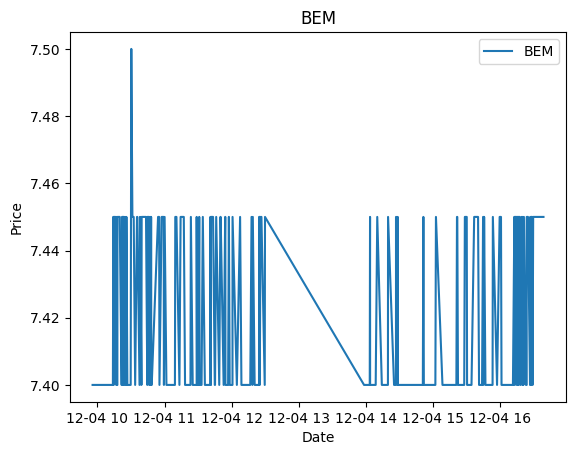

In [98]:
i = 7
# j = 19

a = stocks[i]
# b = stocks[j]

name_a = share_codes[i]
# name_b = share_codes[j]

plt.title(f"{name_a}")
plt.xlabel("Date")
plt.ylabel("Price")
plt.plot(a["TradeDateTime"], a["LastPrice"])
# plt.plot(b["TradeDateTime"], b["LastPrice"])

plt.legend([name_a])